In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from datetime import datetime


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


pd.set_option('display.max_columns', None)


C:\Users\nickd\AppData\Local\Temp\ipykernel_8148\1761498271.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
path = 'customer_segmentation.csv'
df = pd.read_csv(path)

In [3]:
print("First few rows of the DataFrame:")
# print(df.head())
df.head()

First few rows of the DataFrame:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
print("\nMissing values check:")
print(df.isnull().sum())

null_data = df.isnull().sum()


Missing values check:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# plt.figure(figsize=(10, 6))  # Set the figure size
# sns.countplot(data=null_data, palette='viridis')  # Create the countplot
# plt.title('Count of Missing Values')  # Set the title
# plt.xlabel('Missing Values')  # Set the x-axis label
# plt.ylabel('Count')  # Set the y-axis label
# plt.show()  # Show the plot

In [6]:
print("\nDuplicate rows check:")
print(df.duplicated().sum())


Duplicate rows check:
0


In [7]:
# Function to print numerical and non-numerical columns along with their record count
def print_column_info(df):
    print("Numerical columns:")
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        print(f"{col}: {df[col].count()} records")
    
    print("\nNon-numerical columns:")
    non_numerical_cols = df.select_dtypes(exclude=['number']).columns
    for col in non_numerical_cols:
        print(f"{col}: {df[col].count()} records")

print_column_info(df)

Numerical columns:
ID: 2240 records
Year_Birth: 2240 records
Income: 2216 records
Kidhome: 2240 records
Teenhome: 2240 records
Recency: 2240 records
MntWines: 2240 records
MntFruits: 2240 records
MntMeatProducts: 2240 records
MntFishProducts: 2240 records
MntSweetProducts: 2240 records
MntGoldProds: 2240 records
NumDealsPurchases: 2240 records
NumWebPurchases: 2240 records
NumCatalogPurchases: 2240 records
NumStorePurchases: 2240 records
NumWebVisitsMonth: 2240 records
AcceptedCmp3: 2240 records
AcceptedCmp4: 2240 records
AcceptedCmp5: 2240 records
AcceptedCmp1: 2240 records
AcceptedCmp2: 2240 records
Complain: 2240 records
Z_CostContact: 2240 records
Z_Revenue: 2240 records
Response: 2240 records

Non-numerical columns:
Education: 2240 records
Marital_Status: 2240 records
Dt_Customer: 2240 records


In [8]:
# Check unique categories and print if less than 10
print("\nUnique categories in non-numerical columns:")
non_numerical_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numerical_cols:
    unique_categories = df[col].nunique()
    print(f"{col}: {unique_categories} unique categories")
    if unique_categories <= 10:
        print("Unique categories:")
        print(df[col].unique())


Unique categories in non-numerical columns:
Education: 5 unique categories
Unique categories:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: 8 unique categories
Unique categories:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer: 663 unique categories


C:\Users\nickd\AppData\Local\Temp\ipykernel_8148\383332329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marital_Status', palette='viridis')  # Create the countplot


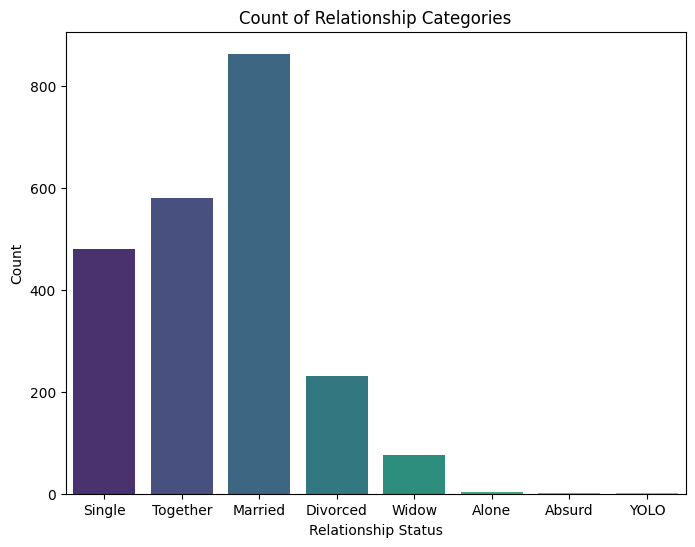

In [9]:
marital_counts = df['Marital_Status'].value_counts()

plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x='Marital_Status', palette='viridis')  # Create the countplot
plt.title('Count of Relationship Categories')  # Set the title
plt.xlabel('Relationship Status')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()  # Show the plot

C:\Users\nickd\AppData\Local\Temp\ipykernel_8148\2696355561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='mako')  # Create the countplot


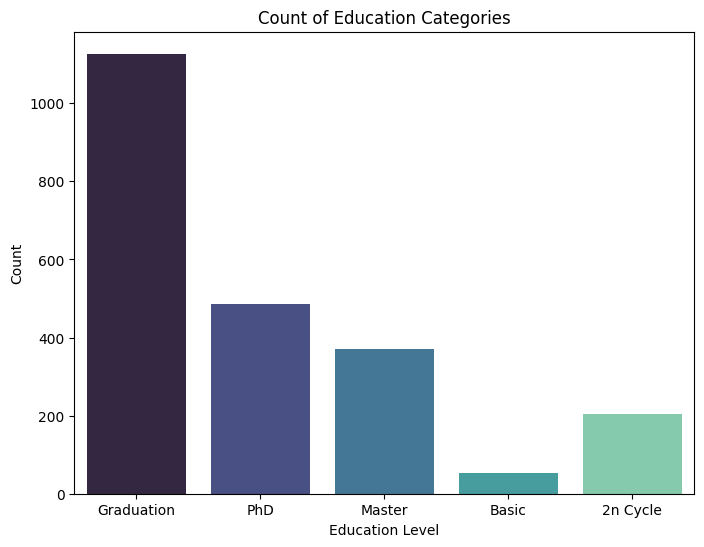

In [10]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x='Education', palette='mako')  # Create the countplot
plt.title('Count of Education Categories')  # Set the title
plt.xlabel('Education Level')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()  # Show the plot

In [11]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min

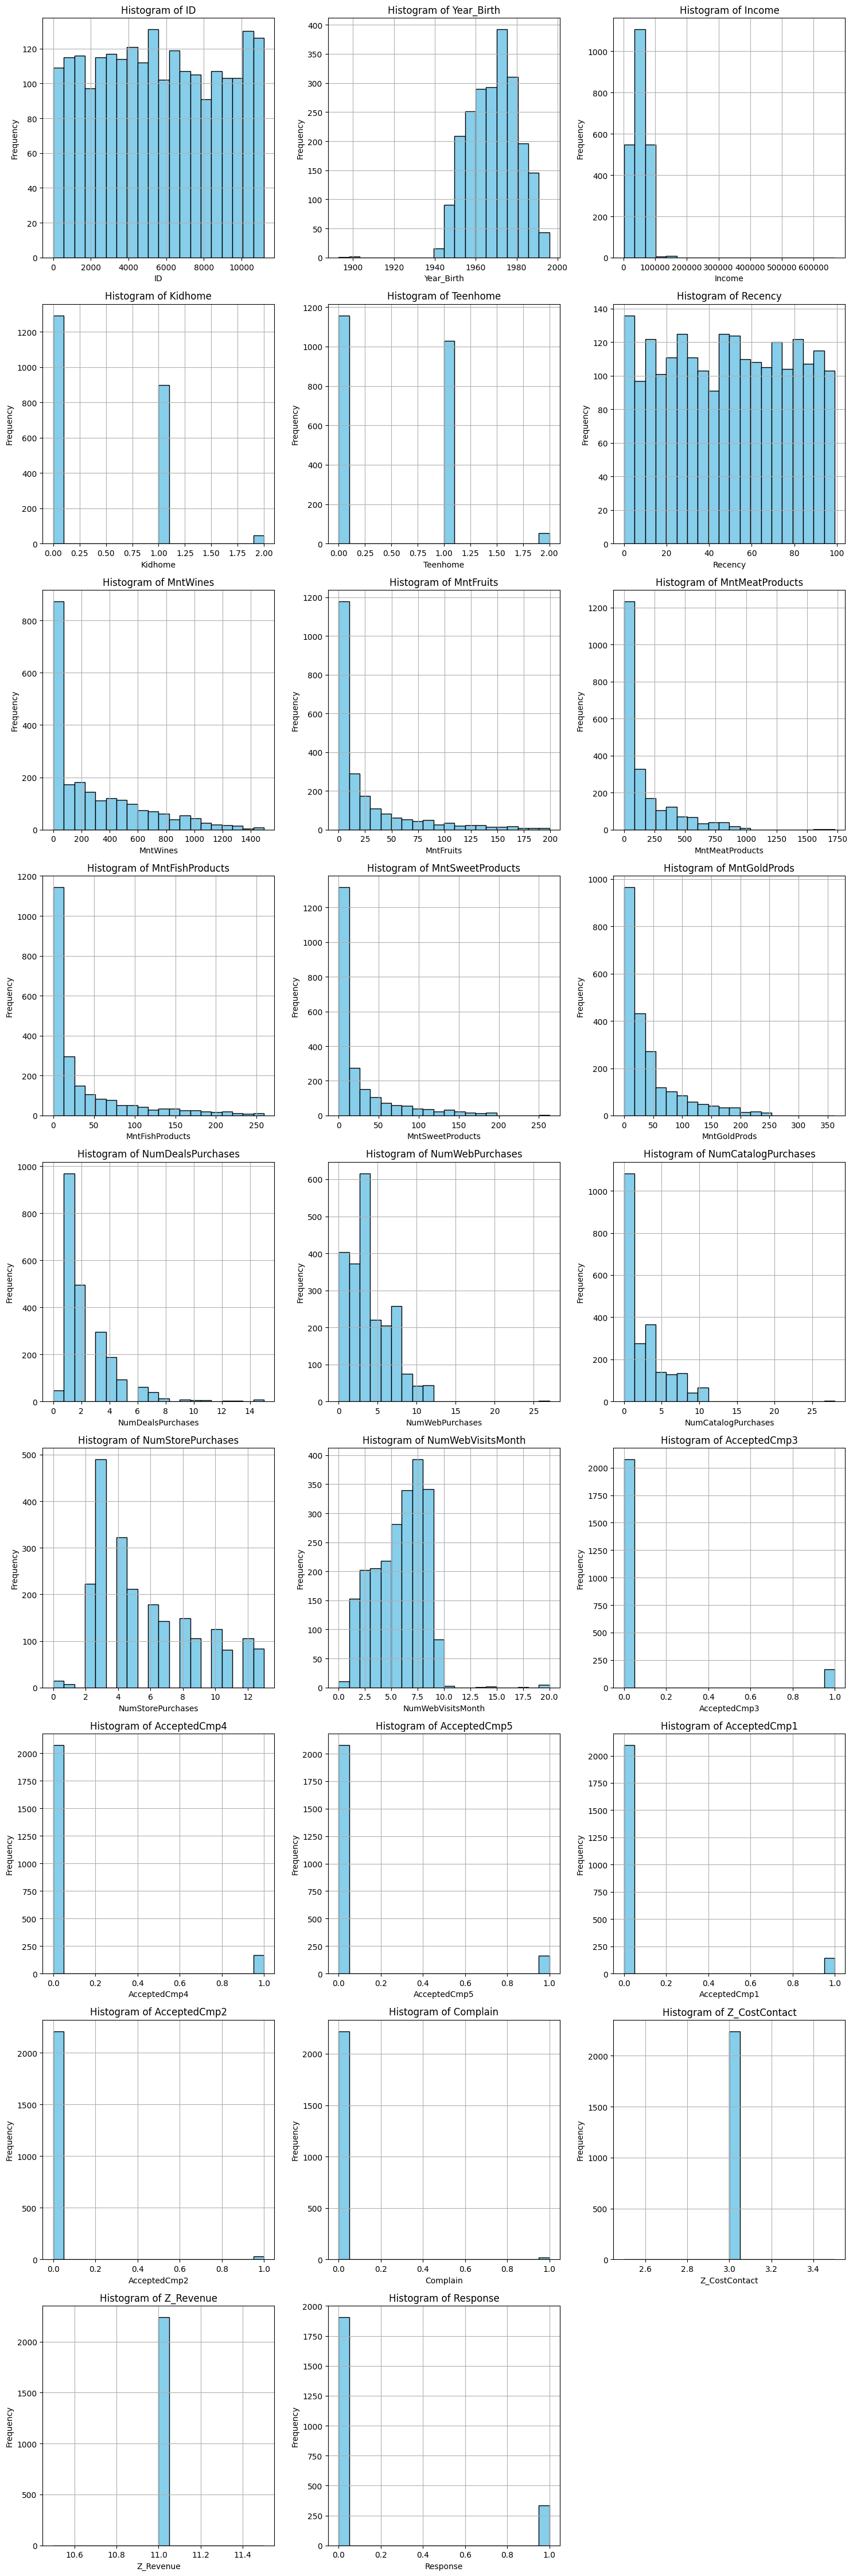

In [12]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  # 3 plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Plot histograms for numerical columns
for i, col in enumerate(numerical_cols):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    df[col].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide empty subplots
for i in range(num_cols, num_rows * 3):
    row_idx = i // 3
    col_idx = i % 3
    if num_rows > 1:
        axes[row_idx, col_idx].axis('off')
    else:
        axes[col_idx].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# # Function to detect and handle outliers using IQR method
# def handle_outliers(df, col):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
    
#     # Detect outliers
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
#     # Replace outliers with median
#     median = df[col].median()
#     df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    
#     return outliers

# # Detect and handle outliers for each numerical column
# outliers_dict = {}
# for col in numerical_cols:
#     outliers = handle_outliers(df, col)
#     outliers_dict[col] = outliers

# # Print outliers for each numerical column
# for col, outliers in outliers_dict.items():
#     print(f"Outliers in {col}:")
#     print(outliers)

# # Print summary statistics after handling outliers
# print("\nSummary statistics after handling outliers:")
# print(df.describe())
# print(df.shape)

In [14]:
mean_income = df['Income'].mean()
print("Mean Income: " + str(mean_income))
df['Income'].fillna(mean_income, inplace=True)

Mean Income: 52247.25135379061


C:\Users\nickd\AppData\Local\Temp\ipykernel_8148\1471172899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(mean_income, inplace=True)


In [15]:
null_values = df.isnull().sum()
print(null_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [16]:
to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df.drop(columns=to_drop, inplace=True)
# df.head()

df_operate  = df.copy()

In [17]:
# def visualize_outliers(data, numerical_features, rows, cols):
#     fig, axes = plt.subplots(rows, cols, figsize=(40, 35))

#     # Flatten the axes array for ease of indexing
#     axes = axes.flatten()

#     for i, feature in enumerate(numerical_features):
#         sns.boxplot(x=data[feature], ax=axes[i])
#         #axes[i].set_title(f'Box Plot for {feature}')
#         axes[i].set_title(f'{feature}')

#     # Remove any empty subplots
#     for j in range(i + 1, len(axes)):
#         fig.delaxes(axes[j])

#     plt.tight_layout()
#     plt.show()

# # Specify the number of rows and columns for the grid
# rows = 10  # You can adjust this based on the number of features
# cols = 7

# # Visualize outliers in the training set
# visualize_outliers(df_operate, numerical_cols, rows, cols)



In [18]:
print("\nMissing values check:")
print(df_operate.isnull().sum())

print(df_operate.shape)


Missing values check:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64
(2240, 20)


In [19]:


marital_categories = df_operate["Marital_Status"].value_counts()
education_categories = df_operate["Education"].value_counts()

print(marital_categories)
print(education_categories)

marital_to_replace = {
    "Married": "Relationship",
    "Together":"Relationship",
    "Single": "Single",
    "Divorced": "Single",
    "Widow": "Single",
    "Alone": "Single",
    "YOLO": "Single"
}

df_operate["Marital_Status"] = df_operate["Marital_Status"].replace(marital_to_replace)
marital_categories = df_operate["Marital_Status"].value_counts()
print(marital_categories)



education_to_replace = {
    "Graduation": "Graduation",
    "PhD": "PhD",
    "Master" :"Master",
    "2n Cycle": "Foundational",
    "Basic": "Foundational"
}

df_operate["Education"] = df_operate["Education"].replace(education_to_replace)
education_categories = df_operate["Education"].value_counts()
print(education_categories)


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Relationship    1444
Single           794
Absurd             2
Name: count, dtype: int64
Education
Graduation      1127
PhD              486
Master           370
Foundational     257
Name: count, dtype: int64


In [20]:
#code to infer the age of the persons

current_year = datetime.now().year

df_operate['age'] = current_year - df_operate['Year_Birth']

# df_operate[]

In [21]:

# One-hot encode non-numeric columns (excluding date-related columns)
categorical_columns = df_operate.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df_operate, columns=categorical_columns, drop_first=True)
print(categorical_columns)
print(df_encoded.shape)

df_encoded = df_encoded.drop('ID', axis = 1)

df_encoded.head()


Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')
(2240, 685)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Relationship,Marital_Status_Single,Dt_Customer_01-01-2014,Dt_Customer_01-02-2013,Dt_Customer_01-02-2014,Dt_Customer_01-03-2013,Dt_Customer_01-03-2014,Dt_Customer_01-04-2013,Dt_Customer_01-04-2014,Dt_Customer_01-05-2013,Dt_Customer_01-05-2014,Dt_Customer_01-06-2013,Dt_Customer_01-07-2013,Dt_Customer_01-08-2012,Dt_Customer_01-08-2013,Dt_Customer_01-09-2012,Dt_Customer_01-09-2013,Dt_Customer_01-10-2012,Dt_Customer_01-10-2013,Dt_Customer_01-11-2012,Dt_Customer_01-11-2013,Dt_Customer_01-12-2012,Dt_Customer_01-12-2013,Dt_Customer_02-01-2013,Dt_Customer_02-01-2014,Dt_Customer_02-02-2013,Dt_Customer_02-02-2014,Dt_Customer_02-03-2013,Dt_Customer_02-03-2014,Dt_Customer_02-04-2013,Dt_Customer_02-04-2014,Dt_Customer_02-05-2013,Dt_Customer_02-05-2014,Dt_Customer_02-06-2013,Dt_Customer_02-06-2014,Dt_Customer_02-07-2013,Dt_Customer_02-08-2012,Dt_Customer_02-08-2013,Dt_Customer_02-09-2012,Dt_Customer_02-09-2013,Dt_Customer_02-10-2012,Dt_Customer_02-10-2013,Dt_Customer_02-11-2012,Dt_Customer_02-11-2013,Dt_Customer_02-12-2012,Dt_Customer_02-12-2013,Dt_Customer_03-01-2013,Dt_Customer_03-01-2014,Dt_Customer_03-02-2013,Dt_Customer_03-02-2014,Dt_Customer_03-03-2013,Dt_Customer_03-03-2014,Dt_Customer_03-04-2013,Dt_Customer_03-04-2014,Dt_Customer_03-05-2013,Dt_Customer_03-05-2014,Dt_Customer_03-06-2013,Dt_Customer_03-06-2014,Dt_Customer_03-07-2013,Dt_Customer_03-08-2012,Dt_Customer_03-08-2013,Dt_Customer_03-09-2012,Dt_Customer_03-10-2013,Dt_Customer_03-11-2012,Dt_Customer_03-11-2013,Dt_Customer_03-12-2012,Dt_Customer_03-12-2013,Dt_Customer_04-01-2013,Dt_Customer_04-01-2014,Dt_Customer_04-02-2013,Dt_Customer_04-02-2014,Dt_Customer_04-03-2013,Dt_Customer_04-03-2014,Dt_Customer_04-04-2014,Dt_Customer_04-05-2013,Dt_Customer_04-05-2014,Dt_Customer_04-06-2013,Dt_Customer_04-06-2014,Dt_Customer_04-07-2013,Dt_Customer_04-08-2012,Dt_Customer_04-08-2013,Dt_Customer_04-09-2012,Dt_Customer_04-09-2013,Dt_Customer_04-10-2012,Dt_Customer_04-10-2013,Dt_Customer_04-11-2012,Dt_Customer_04-11-2013,Dt_Customer_04-12-2012,Dt_Customer_04-12-2013,Dt_Customer_05-01-2013,Dt_Customer_05-01-2014,Dt_Customer_05-02-2014,Dt_Customer_05-03-2013,Dt_Customer_05-03-2014,Dt_Customer_05-04-2013,Dt_Customer_05-04-2014,Dt_Customer_05-05-2013,Dt_Customer_05-05-2014,Dt_Customer_05-06-2014,Dt_Customer_05-07-2013,Dt_Customer_05-08-2012,Dt_Customer_05-08-2013,Dt_Customer_05-09-2012,Dt_Customer_05-09-2013,Dt_Customer_05-10-2012,Dt_Customer_05-10-2013,Dt_Customer_05-11-2012,Dt_Customer_05-11-2013,Dt_Customer_05-12-2012,Dt_Customer_05-12-2013,Dt_Customer_06-01-2013,Dt_Customer_06-01-2014,Dt_Customer_06-02-2013,Dt_Customer_06-02-2014,Dt_Customer_06-03-2013,Dt_Customer_06-03-2014,Dt_Customer_06-04-2013,Dt_Customer_06-04-2014,Dt_Customer_06-05-2013,Dt_Customer_06-05-2014,Dt_Customer_06-06-2013,Dt_Customer_06-06-2014,Dt_Customer_06-07-2013,Dt_Customer_06-08-2012,Dt_Customer_06-08-2013,Dt_Customer_06-09-2012,Dt_Customer_06-09-2013,Dt_Customer_06-10-2012,Dt_Customer_06-10-2013,Dt_Customer_06-11-2012,Dt_Customer_06-11-2013,Dt_Customer_06-12-2012,Dt_Customer_06-12-2013,Dt_Customer_07-01-2013,Dt_Customer_07-01-2014,Dt_Customer_07-02-2013,Dt_Customer_07-02-2014,Dt_Customer_07-03-2013,Dt_Customer_07-03-2014,Dt_Customer_07-04-2013,Dt_Customer_07-04-2014,Dt_Customer_07-05-2013,Dt_Customer_07-05-2014,Dt_Customer_07-06-2014,Dt_Customer_07-07-2013,Dt_Customer_07-08-2012,Dt_Customer_07-08-2013,Dt_Customer_07-09-2012,Dt_Customer_07-09-2013,Dt_Customer_07-10-2012,Dt_Customer_07-11-2012,Dt_Customer_07-11-2013,Dt_Customer_07-12-2012,Dt_Customer_07-12-2013,Dt_Customer_08-01-2013,Dt_Customer_08-02-2013,Dt_Customer_08-02-2014,Dt_Customer_08-03-2013,Dt_Customer_08-03-2014,Dt_Customer_08-04-2013,Dt_Customer_08-04-2014,Dt_Customer_08-05-2013

In [22]:
# Create a correlation matrix for the encoded DataFrame
# correlation_matrix_encoded = df_encoded.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(20, 15))
# sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix (After One-Hot Encoding)')
# plt.show()

In [23]:
#apply PCA on the data
df_scaled = StandardScaler().fit_transform(df_encoded)


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [24]:
print(df_operate.columns)
print(df_encoded.columns)
print(df_operate.shape)
print(df_encoded.shape)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age'],
      dtype='object')
Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       ...
       'Dt_Customer_31-03-2014', 'Dt_Customer_31-05-2013',
       'Dt_Customer_31-05-2014', 'Dt_Customer_31-07-2012',
       'Dt_Customer_31-07-2013', 'Dt_Customer_31-08-2012',
       'Dt_Customer_31-08-2013', 'Dt_Customer_31-10-2012',
       'Dt_Customer_31-12-2012', 'Dt_Customer_31-12-2013'],
      dtype='object', length=684)
(2240, 21)
(2240, 684)


In [25]:
print(df_pca.shape)
print(pca.explained_variance_ratio_)

(2240, 2)
[0.0094563  0.00433311]


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

KMEANS

In [27]:
#Select data for analysis
data = df_pca.copy()
kmeans_plot = df_pca.copy()

In [28]:
#KMEANS
#finding the number of clusters for PCA Using Elbow method.


wcss = []
silhouette_scores = []

for k in range(1, 11):  # Trying k from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

    

for k in range(2, 11):  # Trying k from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    # wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))




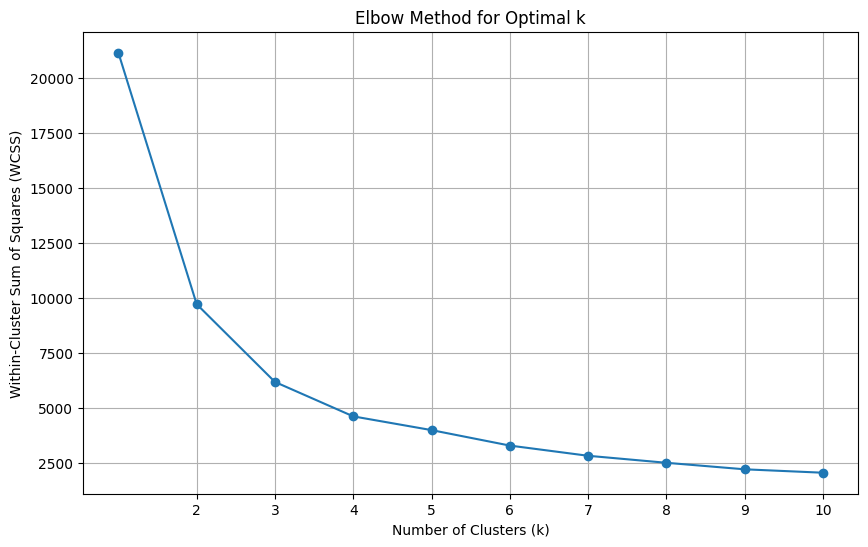

In [29]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

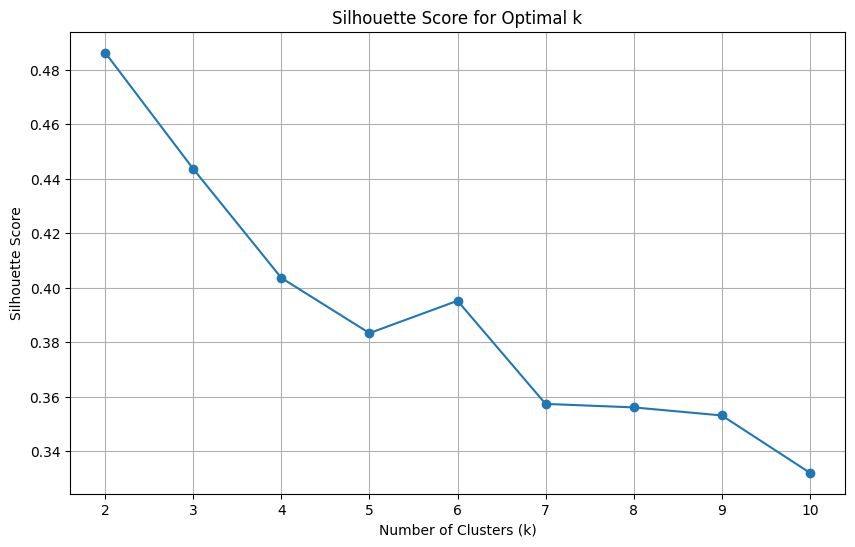

In [30]:
# Plot the Silhouette Score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Since the elbow was most pronounced at n=2, we use this number for the KMeans Clustering. 

In [31]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)
segments = cluster_labels.copy()
print(cluster_labels)
print(len(cluster_labels))


# Calculate silhouette score
silhouette_avg = silhouette_score(data, kmeans.labels_)
wcss = kmeans.inertia_
print(f"WCSS :  {wcss}")
print(f"Silhouette Score: {silhouette_avg}")


[1 0 1 ... 1 1 0]
2240
WCSS :  9704.817434224478
Silhouette Score: 0.48626152709764503


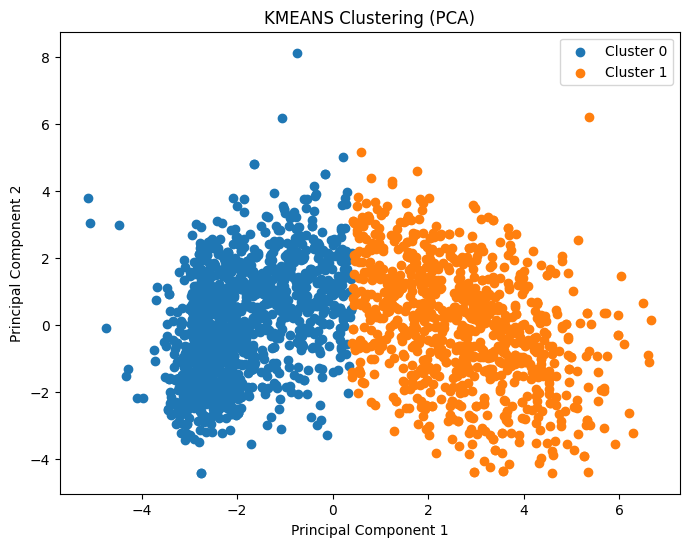

In [32]:
# Plot the clusters in the reduced space


plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    if label == -1:
        plt.scatter(kmeans_plot[cluster_labels == label, 0], kmeans_plot[cluster_labels == label, 1], color='gray', alpha=0.5, label='Noise')
    else:
        plt.scatter(kmeans_plot[cluster_labels == label, 0], kmeans_plot[cluster_labels == label, 1], label=f'Cluster {label}')

plt.title('KMEANS Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [33]:
centroids = kmeans.cluster_centers_
column_names = ['Year_Birth','Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 
'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
'Complain', 'Z_CostContact','Z_Revenue', 'Response' ]

for i, centroid in enumerate(centroids):
    print(f"\nCluster {i} centroid:")
    cluster_contributions = sorted(zip(column_names, centroid), key=lambda x: abs(x[1]), reverse=True)
    for attribute, value in cluster_contributions:
        print(f"\t{attribute}: {value}")



Cluster 0 centroid:
	Year_Birth: -1.8956713936148528
	Education: 0.01035924795264536

Cluster 1 centroid:
	Year_Birth: 2.6899699905074717
	Education: -0.014699839967360441


In [34]:
cluster_centers = kmeans.cluster_centers_
column_names = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact','Z_Revenue', 'Response' ]



for cluster_num, centroid in enumerate(cluster_centers):
    print(f"Attributes of Cluster {cluster_num}:")
    for feature_name, value in zip(column_names, centroid):
        print(f"{feature_name}: {value}")
    print()


Attributes of Cluster 0:
Year_Birth: -1.8956713936148528
Education: 0.01035924795264536

Attributes of Cluster 1:
Year_Birth: 2.6899699905074717
Education: -0.014699839967360441



Trying DBSCAN on data

df
df_operate - dataframe with 
df_encoded
df_scaled
df_pca

DBSCAN

In [35]:
dbscan_data = df_pca.copy()
dbscan_plot = df_pca.copy()
print("test")

test


In [36]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.20, min_samples=6)
dbscan.fit(dbscan_data)

cluster_labels = dbscan.labels_
unique_labels = np.unique(cluster_labels)

n_clusters = len(unique_labels) - 1
print("Number of clusters:", n_clusters)

print("Cluster labels:", cluster_labels)
print(np.unique(cluster_labels))


#wcss not applicable to DBSCAN

silhouette_avg = silhouette_score(dbscan_data, cluster_labels)
print(f"Silhouette score: {silhouette_avg}")



Number of clusters: 38
Cluster labels: [ 0  1  0 ... -1  8 23]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


Silhouette score: -0.33331506823713297


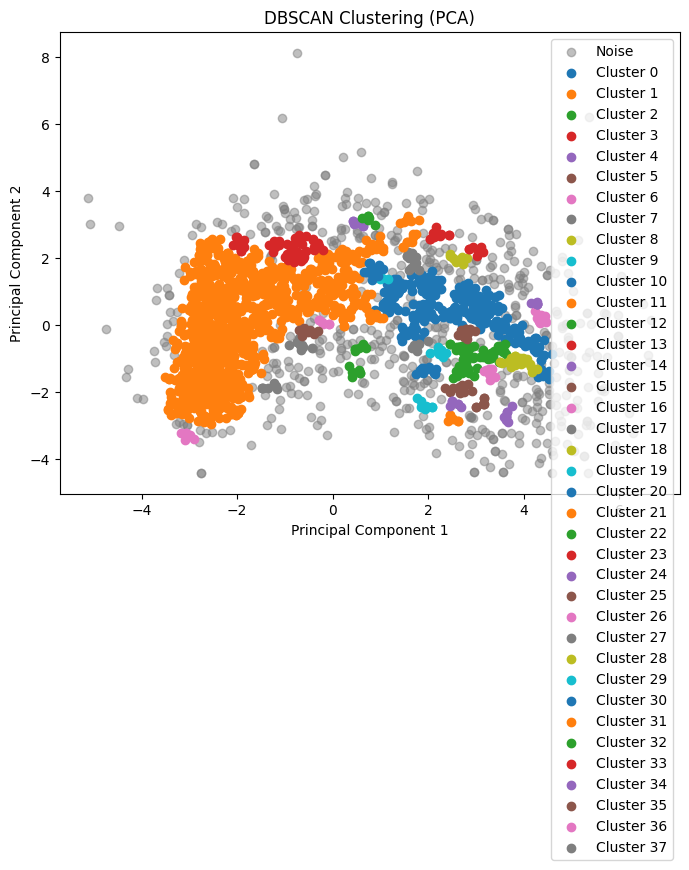

In [37]:
# Plot the clusters in the reduced space
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    if label == -1:
        plt.scatter(dbscan_plot[cluster_labels == label, 0], dbscan_plot[cluster_labels == label, 1], color='gray', alpha=0.5, label='Noise')
    else:
        plt.scatter(dbscan_plot[cluster_labels == label, 0], dbscan_plot[cluster_labels == label, 1], label=f'Cluster {label}')

plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [38]:
hc_data= pd.DataFrame(df_pca)
hc_plot = df_pca.copy()

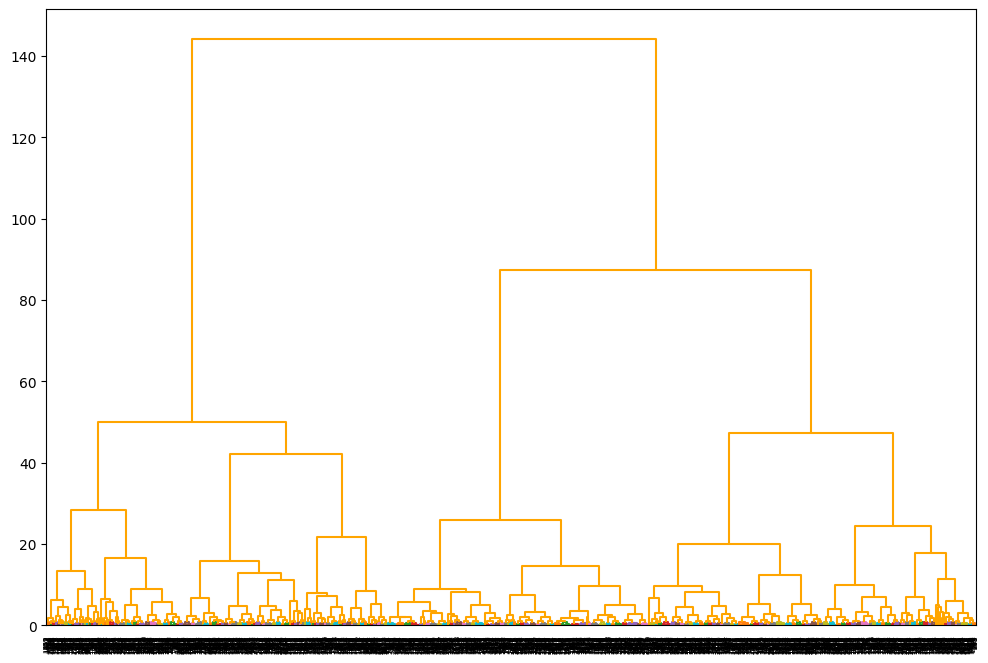

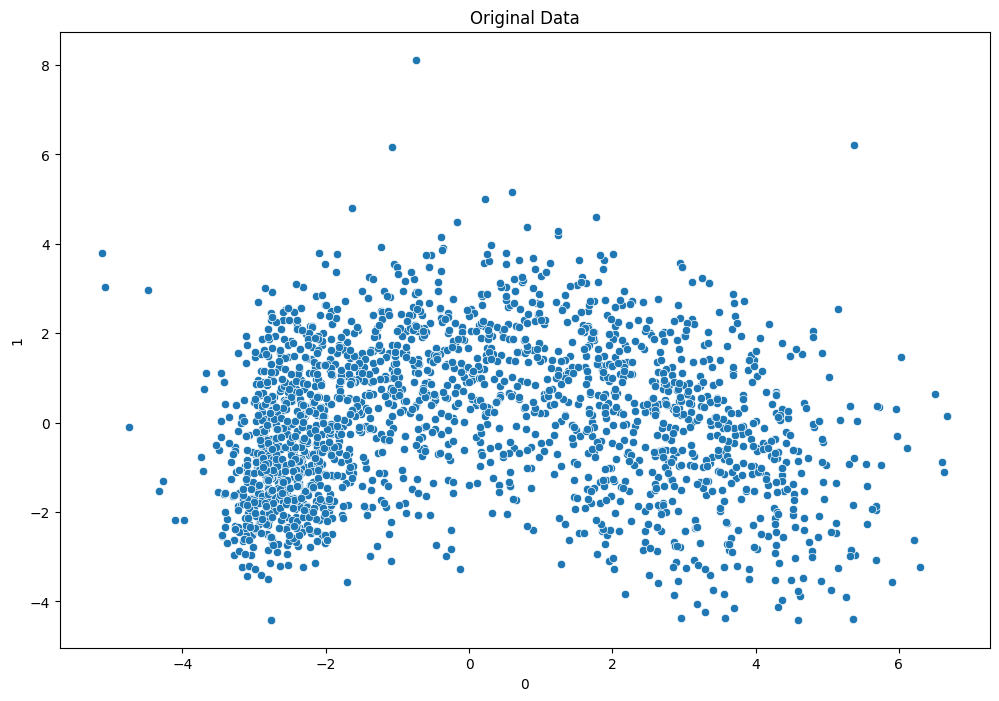

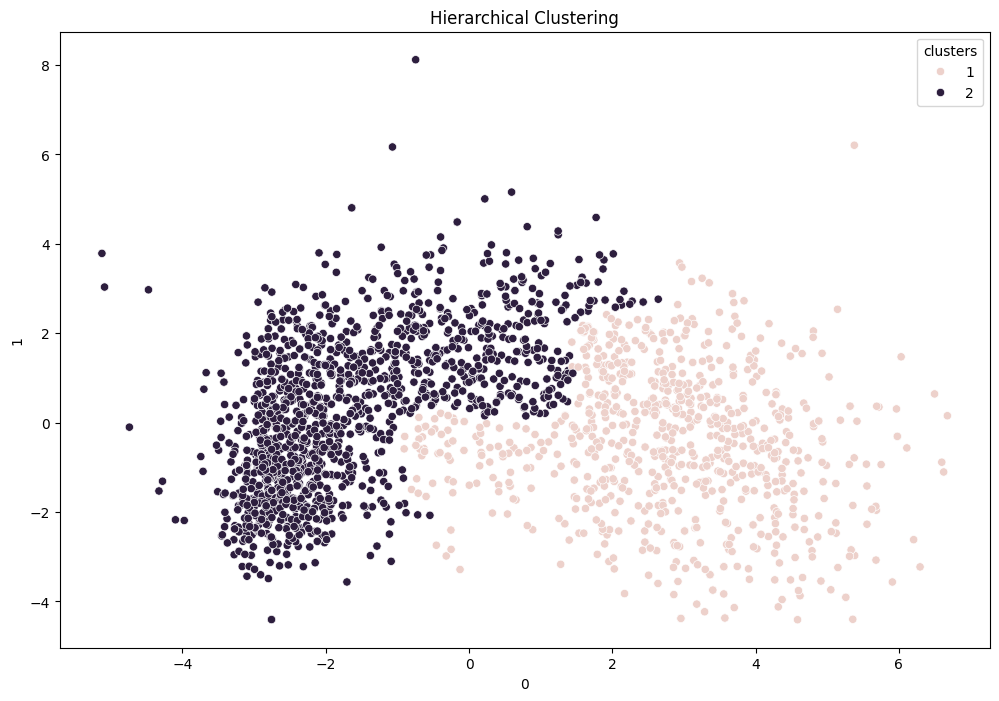

In [39]:
import scipy.cluster.hierarchy as hierarchy


n_clusters = 2
X = pd.DataFrame(hc_data)

model= hierarchy

# Perform hierarchical clustering with Ward's method and visualize
fig, ax = plt.subplots(figsize=(12, 8))
linkage_matrix = model.ward(X)
dendrogram = model.dendrogram(
     linkage_matrix, 
     ax=ax, 
     color_threshold=0.9, 
     above_threshold_color="orange" 
 )

# Plot the original data with clusters
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=X, x=0, y=1, ax=ax)
ax.set_title("Original Data")


# Perform hierarchical clustering with Ward's method, update the DataFrame and visualize
X["clusters"] = model.fcluster(
    linkage_matrix, 
    t=n_clusters, 
    criterion="maxclust"
)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=X, x=0, y=1, hue="clusters", ax=ax)
ax.set_title("Hierarchical Clustering")

plt.show()




In [40]:
print(X["clusters"])


silhouette_avg = silhouette_score(X, X["clusters"])
print("Silhouette Score:", silhouette_avg)


0       1
1       2
2       1
3       2
4       1
       ..
2235    1
2236    2
2237    1
2238    1
2239    2
Name: clusters, Length: 2240, dtype: int32
Silhouette Score: 0.4581005807873001


In [41]:
# output = X["clusters"]
output = segments

df_operate['Segment'] = output
# df_operate['Segment'] = df_operate['Segment'].astype(int)


na_count_A = df_operate['Segment'].isna().sum()

print("Number of NaN values in column 'Segment':", na_count_A)



df_operate.head()

Number of NaN values in column 'Segment': 0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,67,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,70,0
2,4141,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,59,1
3,6182,1984,Graduation,Relationship,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,40,0
4,5324,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,43,0


In [42]:
df_operate.to_csv('output.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'output.csv'